In [357]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Cov-State correlation

In [358]:
df = pd.read_csv('ga_scores.txt', sep="\t")
df.head()

,application,agent,coverage,states
0,org.moire.opensudoku,"[0, 0, 0, 1, 1, 1, 1, 1, 1]",11.0,8
1,org.moire.opensudoku,"[1, 0, 0, 1, 0, 0, 0, 0, 1]",10.0,4
2,org.moire.opensudoku,"[0, 0, 0, 1, 1, 0, 0, 1, 1]",10.0,4
3,org.moire.opensudoku,"[0, 1, 1, 0, 1, 1, 1, 0, 0]",11.0,4
4,org.moire.opensudoku,"[0, 0, 0, 1, 1, 1, 1, 0, 0]",11.0,7


In [359]:
df = df.groupby('application').transform(lambda x: (x - x.mean()) / x.std())
df.head()

,coverage,states
0,-0.342027,0.601999
1,-0.470287,-1.097763
2,-0.470287,-1.097763
3,-0.342027,-1.097763
4,-0.342027,0.177059


In [360]:
df.corr(method="spearman")

,coverage,states
coverage,1.000000,0.438089
states,0.438089,1.000000


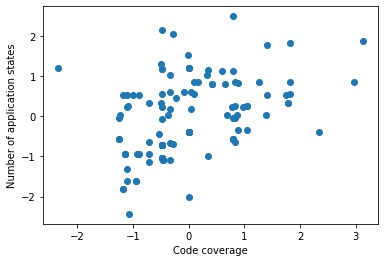

In [361]:
plt.ylabel('Number of application states')
plt.xlabel('Code coverage')
plt.scatter(df['coverage'], df['states'])

## Genetic Algorithm benchmark

In [369]:
ga_tools = pd.read_csv('ga_benchmark_tools.txt', sep='\t')
ga_tools.head()

,application,agent,coverage,states
0,com.smart.consumer.app,"[0, 1, 1, 1, 0, 1, 0, 1, 0]",0,7
1,com.smart.consumer.app,"[0, 0, 1, 1, 1, 1, 0, 1, 0]",0,9
2,com.smart.consumer.app,"[1, 0, 1, 0, 1, 1, 1, 0, 0]",0,9
3,com.smart.consumer.app,"[0, 0, 0, 1, 1, 1, 1, 0, 0]",0,8
4,com.smart.consumer.app,"[1, 0, 1, 0, 1, 1, 0, 1, 0]",0,8


In [370]:
ga_edu = pd.read_csv('ga_benchmark_edu.txt', sep='\t')
ga_edu.head()

,application,agent,coverage,states
0,co.brainly,"[1, 1, 1, 0, 1, 0, 1, 0, 0]",0,2
1,co.brainly,"[0, 1, 0, 1, 1, 0, 1, 1, 0]",0,2
2,co.brainly,"[0, 0, 1, 1, 0, 0, 0, 1, 0]",0,2
3,co.brainly,"[1, 0, 1, 0, 1, 0, 1, 1, 1]",0,4
4,co.brainly,"[1, 0, 1, 0, 1, 0, 1, 0, 0]",0,2


In [371]:
tools_stat = ga_tools.groupby('application').max()
tools_stat.head()

,agent,coverage,states
application,,,
app.intra,"[1, 1, 1, 0, 0, 1, 0, 1, 1]",0,11
app.quantum.supdate,"[1, 1, 1, 0, 1, 0, 0, 0, 0]",0,-1
club.ultracleaner.pro,"[1, 1, 1, 1, 0, 1, 1, 1, 0]",0,12
com.adaranet.android.droidproxyclient2,"[1, 1, 1, 1, 1, 1, 0, 0, 1]",0,-1
com.allvideo.downloader.instantsaver,"[1, 0, 0, 1, 1, 0, 1, 1, 0]",0,-1


In [372]:
rules_name = ['ViewPager','ImageButton','ActionBar','SkipButton','RandomTouch','RandomClickElement','FillTextFields','LoopThroughMenu','RandomBack',]

In [380]:
def get_stat(filename):
    ga_stat = pd.read_csv(filename, sep='\t')
    ga_stat = ga_stat.groupby('application').max()
    ga_stat = ga_stat[ga_stat.states != -1]
    return ga_stat

def rule_dist(filename, title=None):
    if not title:
        title = filename
    ga_stat = get_stat(filename)
    rules = np.array([0] * 9)
    for agent in ga_stat['agent']:
        rules += np.array(eval(agent))
    plt.figure(figsize=(15, 4))
    plt.ylabel('Application Count')
    plt.title(title)
    plt.bar(rules_name, rules)
    plt.show()

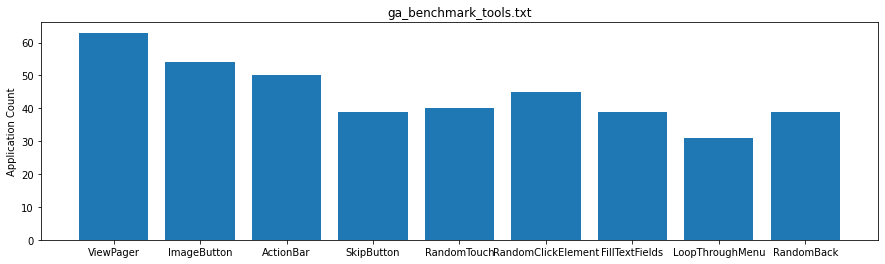

In [381]:
rule_dist('ga_benchmark_tools.txt')

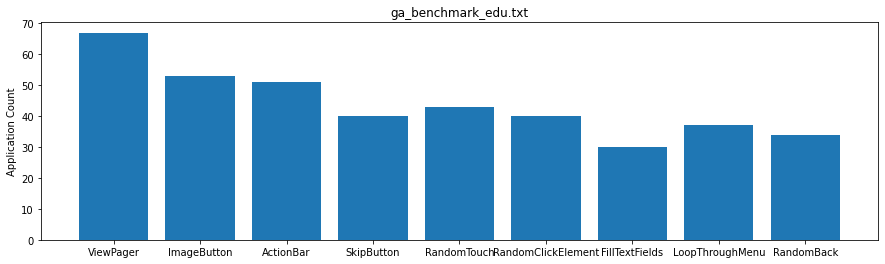

In [382]:
rule_dist('ga_benchmark_edu.txt')

เลือก top 5 rules เทียบกับ Mankey ด้วยจำนวน state (แยกหมวด + รวมหมวด)

In [31]:
working_app_list = list(pd.concat([get_stat('ga_benchmark_tools.txt'), get_stat('ga_benchmark_edu.txt')]).index)
import random
random.shuffle(working_app_list)
with open('example_apps.txt', 'w') as fp:
    fp.write('\n'.join(working_app_list))

## Models Comparison

In [338]:
result = pd.read_csv('model_comparison.txt', sep='\t')
result
result.time = result.apply(lambda row: row.time - 147 if row['mode'] == 'mankey' else row.time, axis=1)
result


,application,mode,states,score,time
0,com.discord,mankey,5,0.0,490.271503
1,com.discord,ga,4,0.0,213.602433
2,org.plantnet,mankey,7,0.0,471.634470
3,org.plantnet,ga,9,0.0,158.786235
4,ru.zdevs.zarchiver,mankey,3,0.0,811.949989
...,...,...,...,...,...
118,com.teacapps.barcodescanner,ga,15,-1.0,295.809376
119,com.vid.vidman,mankey,4,-1.0,126.727928
120,com.vid.vidman,ga,5,-1.0,75.171217
121,com.google.android.apps.chromecast.app,mankey,7,-1.0,251.860468


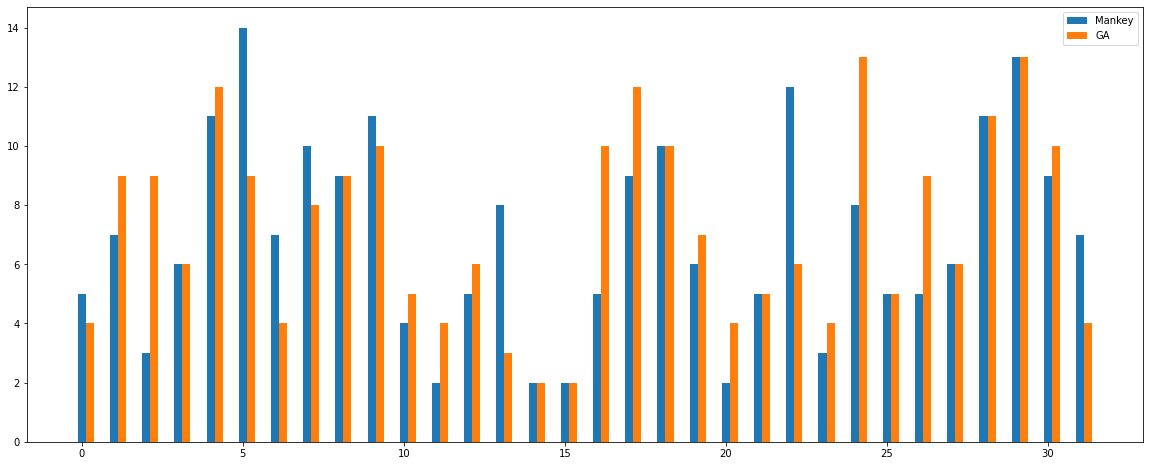

In [339]:
result = result.head(64)
apps = result['application'].drop_duplicates()
plt.figure(figsize=(20, 8))
X = np.arange(32)
plt.bar(X + 0.00, result[result['mode'] == 'mankey']['states'], width=0.25)
plt.bar(X + 0.25, result[result['mode'] == 'ga']['states'], width=0.25)
plt.legend(labels=['Mankey', 'GA'])
plt.show()

In [340]:
df = pd.read_csv('tracking.txt', sep="\t")
history = df.history.str.split(',', expand=True).astype(float).diff(axis=1)
df

,app,method,history
0,org.plantnet,mankey,"96.63167095184326,104.84792494773865,108.74945..."
1,org.plantnet,ga,"22.280051946640015,27.62149667739868,54.081584..."
2,ru.zdevs.zarchiver,mankey,"95.54562282562256,100.26564574241638,112.29468..."
3,ru.zdevs.zarchiver,ga,"23.400795936584473,28.462110996246338,33.31227..."
4,org.plantnet,mankey,"102.53828883171082,105.87917804718018,108.4653..."
...,...,...,...
104,com.teacapps.barcodescanner,ga,"23.21724009513855,26.619557857513428,28.788508..."
105,com.vid.vidman,mankey,"140.13297295570374,143.80116510391235,195.6308..."
106,com.vid.vidman,ga,"31.51500916481018,37.892143964767456,53.554778..."
107,com.google.android.apps.chromecast.app,mankey,"109.23867630958557,110.99156713485718,113.2960..."


In [341]:
df = pd.concat([df, history], axis=1)
df.drop('history', inplace=True, axis=1)
df.dropna(thresh=3, inplace=True)
df.head()

,app,method,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,org.plantnet,mankey,NaN,8.216254,3.901535,5.271901,8.799876,11.306609,42.225053,3.823190,3.138697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,org.plantnet,ga,NaN,5.341445,26.460088,9.531070,7.949944,38.841634,16.474342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ru.zdevs.zarchiver,mankey,NaN,4.720023,12.029038,42.403978,17.333959,3.563473,12.779329,3.822409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ru.zdevs.zarchiver,ga,NaN,5.061315,4.850168,2.311344,5.186872,2.657122,93.200791,19.961753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,org.plantnet,mankey,NaN,3.340889,2.586176,2.414588,2.209937,10.668093,4.950939,12.312283,20.187674,2.717072,NaN,NaN,NaN,NaN,NaN,NaN,NaN


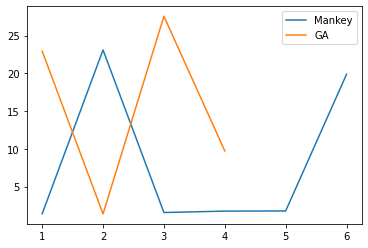

In [342]:
def compare_time(app_id):
    ga = df.query(f"app=='{app_id}' & method=='ga'").drop(['app', 'method'], axis=1).transpose()
    mk = df.query(f"app=='{app_id}' & method=='mankey'").drop(['app', 'method'], axis=1).transpose()
    plt.plot(mk)
    plt.plot(ga)
    plt.legend(labels=['Mankey', 'GA'])
    plt.show()
compare_time('org.thoughtcrime.securesms')

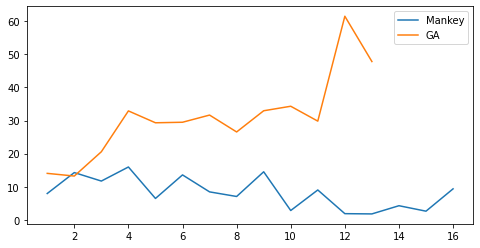

In [346]:
mean_time = df.groupby('method').mean()
ga_mean_time = mean_time[mean_time.index == 'ga'].transpose()
mankey_mean_time = mean_time[mean_time.index == 'mankey'].transpose()
plt.figure(figsize=(8, 4))
plt.plot(mankey_mean_time, label='Mankey')
plt.plot(ga_mean_time, label='GA')
plt.legend(labels=['Mankey', 'GA'])